<a href="https://colab.research.google.com/github/mortymh/moryton/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
## 01_project_intro
# پروژه طبقه‌بندی ارقام دست‌نویس با الگوریتم K-Nearest Neighbors (KNN)
'''
**هدف پروژه:**
آشنایی با الگوریتم KNN و نحوه کار با دیتاست MNIST جهت طبقه‌بندی تصاویر ارقام دست‌نویس.

**دیتاست:**
MNIST dataset شامل ۷۰,۰۰۰ تصویر ۲۸x۲۸ پیکسلی از ارقام ۰ تا ۹ است.

**مراحل اصلی:**
- بارگذاری و بررسی داده‌ها
- پیش‌پردازش (نرمال‌سازی)
- تقسیم داده‌ها به مجموعه آموزش و تست
- آموزش مدل KNN
- ارزیابی دقت مدل
- نمایش نمونه‌های پیش‌بینی شده
'''
print("done")

'''
# Handwritten Digit Classification using K-Nearest Neighbors (KNN)

**Project Goal:**
To understand the KNN algorithm and how to work with the MNIST dataset for handwritten digit classification.

**Dataset:**
The MNIST dataset contains 70,000 images of 28x28 pixels representing digits from 0 to 9.

**Main Steps:**
- Loading and exploring data
- Preprocessing (Normalization)
- Splitting data into training and testing sets
- Training the KNN model
- Evaluating the model accuracy
- Displaying sample predictions

'''

done


In [26]:
# 02_import_libraries
'''
در این سلول، کتابخانه‌های مورد نیاز برای پردازش داده، نمایش تصویر، آموزش مدل، ارزیابی مدل و اتصال به گوگل درایو ایمپورت می‌شوند.
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import drive


In [27]:
# 03_mount_and_load_data
'''
وظیفه این سلول اتصال به گوگل درایو جهت دسترسی به فایل دیتاست و بارگذاری داده‌های خام (بدون پردازش) از فایل npz می‌باشد.
سپس تعداد نمونه‌ها، تعداد ویژگی‌ها و چند نمونه اولیه از برچسب‌ها چاپ می‌شود.
'''
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/mnist_data_raw.npz'  # مسیر فایل دیتاست خام
data = np.load(data_path)

X, y = data['X'], data['y']

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (pixels): {X.shape[1]}")
print(f"Sample labels: {y[:10]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of samples: 70000
Number of features (pixels): 784
Sample labels: [5 0 4 1 9 2 1 3 1 4]


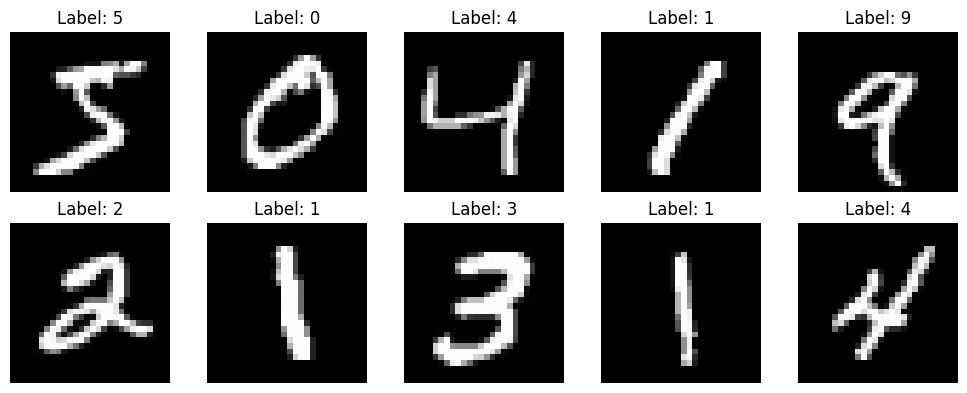

In [28]:
# 04_initial_data_exploration
'''
در این سلول چند نمونه تصویر از داده‌های ورودی به صورت بصری نمایش داده می‌شود تا دید اولیه‌ای نسبت به داده‌ها و برچسب‌ها داشته باشیم.
'''
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [29]:
# 05_preprocessing
'''
این سلول وظیفه پیش‌پردازش داده‌ها را دارد که شامل نرمال‌سازی مقادیر پیکسل‌ها در بازه 0 تا 1 می‌شود.
سپس حداقل و حداکثر مقدار داده‌ها پس از نرمال‌سازی چاپ می‌شود تا از درست بودن عملیات مطمئن شویم.
'''
X = X / 255.0

print("Data values after normalization:")
print(f"Minimum value: {X.min()}, Maximum value: {X.max()}")


Data values after normalization:
Minimum value: 0.0, Maximum value: 1.0


In [30]:
# 06_train_test_split
'''
وظیفه این سلول تقسیم داده‌ها به دو بخش آموزش و تست با نسبت ۸۰ درصد آموزش و ۲۰ درصد تست است.
همچنین با تنظیم random_state، تقسیم داده‌ها به صورت تکرارپذیر انجام می‌شود.
تعداد نمونه‌های هر بخش نیز چاپ می‌شود.
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")


Number of training samples: 56000
Number of testing samples: 14000


In [31]:
# 07_train_knn_model
'''
در این سلول مدل K-Nearest Neighbors با تعداد ۳ همسایه تعریف و روی داده‌های آموزش آموزش داده می‌شود.
پیغام اتمام آموزش چاپ می‌شود.
'''
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print("Model training is complete.")


Model training is complete.


Test set accuracy: 0.9713

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



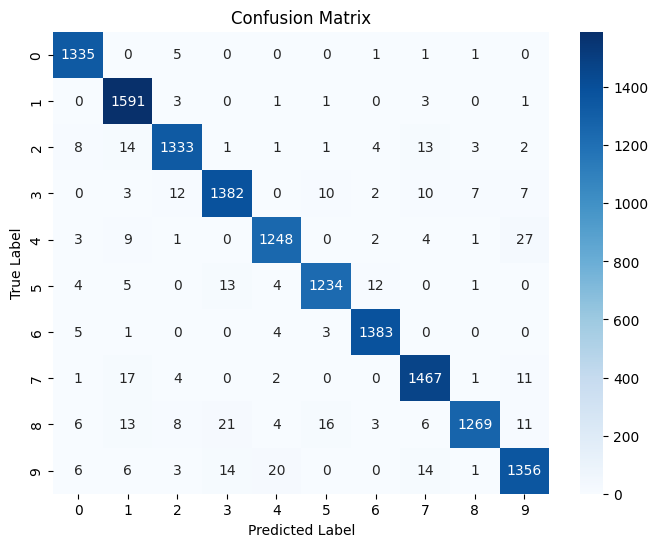

In [32]:
# 08_evaluate_model
'''
این سلول مدل آموزش‌دیده را روی داده‌های تست ارزیابی می‌کند.
ابتدا برچسب‌ها پیش‌بینی می‌شوند و سپس دقت مدل محاسبه و چاپ می‌شود.
در ادامه گزارش طبقه‌بندی شامل معیارهای دقیق‌تر نمایش داده می‌شود.
در نهایت ماتریس درهم‌ریختگی مدل به صورت نمودار گرمایی رسم می‌شود.
'''
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


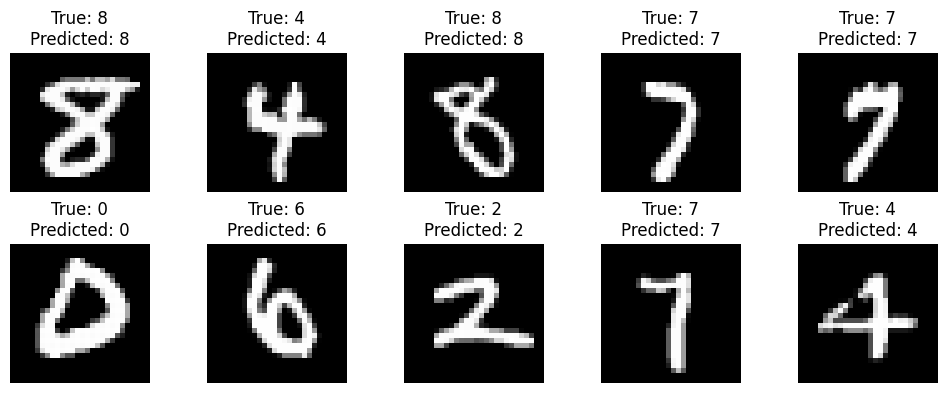

In [33]:
# 09_show_predictions
'''
در این سلول چند نمونه تصویر از داده تست همراه با برچسب واقعی و برچسب پیش‌بینی شده نمایش داده می‌شود
تا عملکرد مدل به صورت بصری ارزیابی شود.
'''
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# 10_summary
# جمع‌بندی پروژه
'''
در این پروژه با استفاده از الگوریتم K-Nearest Neighbors، تصاویر دست‌نویس ارقام را طبقه‌بندی کردیم.

مراحل اصلی شامل بارگذاری داده‌های خام، پیش‌پردازش و نرمال‌سازی، تقسیم داده‌ها به مجموعه آموزش و تست، آموزش مدل و ارزیابی دقت آن بود.

مدل KNN با تعداد ۳ همسایه توانست دقت خوبی در تشخیص ارقام داشته باشد.

در نهایت چند نمونه از تصاویر پیش‌بینی شده را به همراه برچسب واقعی مشاهده کردیم که نشان‌دهنده عملکرد قابل قبول مدل است.
'''

'''
# Project Summary

In this project, we classified handwritten digit images using the K-Nearest Neighbors (KNN) algorithm.

The main steps included loading raw data, preprocessing and normalization, splitting data into training and testing sets, training the model, and evaluating its accuracy.

The KNN model with 3 neighbors achieved good accuracy in recognizing digits.

Finally, we visualized several test images along with their true and predicted labels, demonstrating the model's satisfactory performance.
'''